In [1]:
# import modules & set up logging
import gensim, logging
from sortedcontainers import SortedDict
from gensim.models import KeyedVectors
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import unidecode
import pickle
import random
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
%matplotlib inline
import glob, os
import pybootstrap as pb
from scipy.stats.stats import pearsonr
import pymc3 as pm
from scipy.spatial.distance import cosine as cosine_distance

In [2]:
from aligning_embeddings import *
from w2vtransformation import *
from relation import *
from helper import *

In [3]:
import zipfile
import datetime
import urllib.request
import os.path
import matplotlib.pyplot as plt
from umap import UMAP # actually called "umap-learn"
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
#models_all = load_models('all', 10, align=True)

In [5]:
models_vk = load_models('vk', 5, align=True)
models_telegraaf = load_models('telegraaf', 5, align=True)
models_ah_nrc = load_models('ah_nrc', 5, align=True)
models_trouw = load_models('trouw', 5, align=True)
models_parool = load_models('parool', 5, align=True)
models_vv = load_models('vv', 5, align=True)
#models_lc = load_models('leeuwarder_courant', 10, align=True)

In [6]:
#embeddings = [models_vk, models_vk_sample, models_vk_10k_sample]
#embedding_names = ['vk', 'vk_sample', 'vk_sample_10k']

embeddings = [models_vk, models_telegraaf, models_ah_nrc, models_trouw,
              models_parool, models_vv]
embedding_names = ['vk', 'telegraaf', 'nrc', 'trouw', 'parool', 'vv']

In [7]:
male_words = ['vader', 'opa', 'zoon', 'man', 'mannen', 'heer']
female_words = ['moeder', 'oma', 'dochter', 'vrouw', 'vrouwen', 'dame']

In [8]:
'''
Translated lists from Garg et al. article
'''
occupations = ['concierge', 'statisticus', 'vroedvrouw', 'veilingmeester', 
               'fotograaf', 'geoloog', 'schoenmaker', 'atleet', 'kassier', 'kassiere', 
               'danser', 'huishoudster', 'accountant', 'natuurkundige', 'tuinman', 'tandarts', 
               'smid', 'psycholoog', 'supervisor', 'wiskundige', 'kleermaker', 'ontwerper', 'econoom', 'monteur', 
               'arbeider', 'postbeambte', 'makelaar', 'chemicus', 'bibliothecaris', 'bediende', 
               'administratief', 'musicus', 'portier', 'wetenschapper', 'timmerman', 'zeeman', 'instructeur', 
               'sheriff', 'piloot', 'inspecteur', 'metselaar', 'bakker', 'beheerder', 'architect', 'verzamelaar', 
               'exploitant', 'chirurg', 'bestuurder', 'schilder', 'dirigent', 'verpleegkundige', 'kok', 'ingenieur', 
               'gepensioneerd', 'verkoper', 'advocaat', 'pastoor', 'priester', 'arts', 'boer', 'bediende', 'manager', 'bewaker', 
               'kunstenaar', 'smid', 'ambtenaar', 'politie', 'dokter', 'professor', 'student', 'rechter', 'leraar', 
               'auteur', 'secretaresse', 'soldaat']

occupations_stereotype = ['leraar', 'auteur', 'monteur', 'makelaar', 'bakker', 
                          'arbeider', 'chirurg', 'tuinman', 'schilder', 
                          'tandarts', 'portier', 'atleet', 'manager', 'dirigent', 'timmerman', 
                          'huishoudster', 'secretaresse', 'econoom', 'geoloog', 'klerk', 'dokter', 
                          'rechter', 'arts', 'advocaat', 'kunstenaar', 'instructeur', 'danseres', 
                          'fotograaf', 'inspecteur', 'muzikant', 'soldaat', 'bibliothecaris', 
                          'professor', 'psycholoog', 'verpleegkundige', 'matroos', 'accountant', 
                          'architect', 'scheikundige', 'beheerder', 'fysicus', 'wetenschapper', 'boer', 'kunstenares']

adjectives = "ongeorganiseerd, slinkend, beïnvloedbaar, behoedzaam, onbeweeglijk, doelloos, onpeilbaar, grillig, onprincipe, onschuldig, haatdragend, bizar, onpraktisch, sarcastisch, misleidend, imitatief, pedant, giftig, grillig, onzeker, vindingrijk, neurotisch, vergevingsgezind, profilerend, grillig, assertief, onverderfelijk, individualistisch, ontrouw, verontrustend, barbaars, wraakzuchtig, opmerkzaam, losbandig, angstaanjagend, zelfgenoegzaam, luidruchtig, pretentieus, ongehoorzaam, smaakloos, zittend, gediplomeerd, regiment, zacht, bedrieglijk, impulsief, speels, sociaal, methodisch, eigenzinnig, idealistisch, jongensachtig, kaal, pompeus, onveranderlijk, sluw, punctueel, meelevend, onverdraagzaam, uitdagend, minachtend, bezitterig, opgevat, onvoorzichtig, plichtsgetrouw, beminnelijk, ontrouw, dromerig, dankbaar, vergeetachtig, ongebreideld, krachtig, onderdanig, roofzuchtig, fanatiek, onlogisch, opgeruimd, ambitieus, leergierig, aanpasbaar, verzoenend, listig, gedachteloos, bedrieglijk, f ruig, reflecterend, beledigend, onbetrouwbaar, stoïcijns, hysterisch, rustiek, geremd, uitgesproken, ongezond, asceet, skeptisch, nauwgezet, beschouwend, ontspannen, sluw, buitensporig, lyrisch, rustig, cynisch, onverantwoordelijk, kwetsbaar, arrogant, overtuigend, pervers, standvastig, helder, jaloers, naïef, hebzuchtig, aanmatigend, onaangenaam, prikkelbaar, oneerlijk, discreet, sportief, haatdragend, ondankbaar, lichtzinnig, reactionair, bekwaam, laf, smerig, dogmatisch, intuïtief, flauw, toegeeflijk, ontevreden, overheersend, gearticuleerd, fantasierijk, ontmoedigend, verraderlijk, onderdrukt, humeurig, sensueel, onvriendelijk, optimistisch, onhandig, verachtelijk, gefocust, hooghartig, morbide, rommelig, attent, humoristisch, preoccuped, luchtig, onpersoonlijk, beschaafd, vertrouwend, Respectvol, nauwgezet, geleerde, bijgelovig, tolerant, realistisch, kwaadaardig, irrationeel, gezond, kleurloos, mannelijk, geestig, inert, vooringenomen, frauduleus, bot, kinderachtig, broos, gedisciplineerd, responsief, moedig, bewi ldered, hoffelijk, koppig, afstandelijk, sentimenteel, atletisch, extravagant, brutaal, mannelijk, coöperatief, onstabiel, jeugdig, timide, aimabel, teruggetrokken, vurig, vertrouwelijk, ontspannen, fantasierijk, mystiek, sluw, gewetensvol, monsterlijk, grimmig, verhoor, lui, dynamisch, somber, lastig, abrupt, welsprekend, waardig, hartelijk, galant, welwillend, moederlijk, vaderlijk, patriottisch, agressief, competitief, elegant, flexibel, gracieus, energiek, taai, tegenstrijdig, verlegen, slordig, cau- zwaar, gepolijst, wijsgeer, gespannen, zorgzaam, achterdochtig, nuchter, netjes, transparant, verontrustend, gepassioneerd, gehoorzaam, gek, terughoudend, angstig, gedurfd, voorzichtig, veeleisend, ongeduldig, cerebraal, berekenend, grappig, eervol, terloops, delen, zelfzuchtig, geruïneerd, spontaan, bewonderenswaardig, conventioneel, vrolijk, eenzaam, stijf, enthousiast, onbeduidend, vies, subjectief, heldhaftig, dom, bescheiden, indrukwekkend, ordelijk, ambitieus, beschermend, dom, alert, destructief, opwindend, ruw, belachelijk, subtiel, volwassen, creati ve, grof, passief, onderdrukt, toegankelijk, charmant, slim, fatsoenlijk, ellendig, oppervlakkig, oppervlakkig, streng, winnend, gebalanceerd, emotioneel, rigide, onzichtbaar, wanhopig, wreed, romantisch, aangenaam, snel, sympathiek, plechtig, systematisch, vaag, vredig, bescheiden, saai, opportuun, loyaal, beslissend, willekeurig, ernstig, zelfverzekerd, conservatief, dwaas, matig, behulpzaam, delicaat, zachtaardig, toegewijd, vriendelijk, vrijgevig, betrouwbaar, dramatisch, nauwkeurig, rustig, gezond, aantrekkelijk, kunstmatig, progressief, oneven, verward, verhoudingsgewijs, briljant, intens, echt, verkeerd, rijden, stabiel, objectief, gevoelig, neutraal, streng, boos, diepgaand, glad, onwetend, grondig, logisch, intelligent, buitengewoon, experimenteel, stabiel, formeel, trouw, nieuwsgierig, gereserveerd, eerlijk, druk, opgeleid, liberaal, vriendelijk, efficiënt, lief, verrassend, mechanisch, schoon, kritisch, crim- inal, zacht, trots, rustig, zwak, angstig, vast, complex, groots, warm, langzaam, vals, extreem, nauw, afhankelijk, wijs, georganiseerd, puur, geregisseerd, droog, overduidelijk, populair, capabel, veilig, actief, onafhankelijk, gewoon, vast, praktisch, serieus, eerlijk, begrip, constant, koud, verantwoordelijk, diep, religieus, privé, eenvoudig, fysiek, origineel, werkend, sterk, modern, vastberaden, open, politiek, moeilijk, kennis, vriendelijk"
adjectives = [item.strip().lower() for item in adjectives.split(',')]

competences = "vindingrijk, nieuwsgierig, schrander, inventief, scherpzinnig, reflecterend, intuïtief, vragend, oordeelkundig, analytisch, lichtgevend, eerbiedig, fantasierijk, sluw, attent, wijsgeer, slim, geniaal, slim, briljant, logisch, intelligent, apt, genius, wijs"
competences = [item.strip().lower() for item in competences.split(',')]

physical = "aanlokkelijk, wellustig, blozend, huiselijk, mollig, sensueel, schitterend, slank, kaal, athiek, modieus, stout, lelijk, gespierd, slank, zwak, knap, gezond, aantrekkelijk, dik, zwak, dun, mooi, mooi, sterk"
physical = [item.strip() for item in physical.split(',')]

In [9]:
# '''
# lists of jobs from HISCO dataset
# '''
# hisco = pd.read_csv('../code/hsn2013a_hisco_comma.csv')
# hisco['len'] = hisco['Standard'].str.split().apply(lambda x: len(x))
# jobs = hisco[hisco['len'] == 1]['Standard'].drop_duplicates()

#Variance is too high

In [10]:
'''
Emotions with polarities from Cornetto
'''

emotions = pd.read_csv('../code/emotion_cornetto.csv')
emotions.drop_duplicates(subset=['word'], keep='first', inplace=True)
#emotions = emotions[emotions['polarity'] != 0]

emotions['word'] = emotions['word'].apply(lambda x: unidecode.unidecode(x))
emotion_words = emotions[emotions['confidence'] == 1.0]['word'].values

In [11]:
'''
Dutch translation of LIWC
'''
LIWC = pd.read_csv('../code/LIWC_Dutch.csv')
for col in LIWC.columns:
    try:
        LIWC[col] = LIWC[col].apply(lambda x: unidecode.unidecode(x)).values
    except:
        pass
LIWC.columns

Index(['Othref', 'Time', 'Inhib', 'Space', 'Posemo', 'Self', 'Social',
       'Humans', 'Sports', 'Other', 'Music', 'Swear', 'Discrep', 'Nonfl',
       'You', 'Cause', 'Sexual', 'Achieve', 'Relig', 'Cogmech', 'We', 'Senses',
       'Eating', 'Optim', 'Incl', 'Leisure', 'Job', 'Hear', 'Preps', 'Affect',
       'Excl', 'Home', 'Friends', 'Present', 'Body', 'School', 'Comm',
       'Physcal', 'I', 'Groom', 'Tentat', 'Up', 'Motion', 'Negate', 'Future',
       'Death', 'Article', 'Fillers', 'Family', 'Pronoun', 'Metaph', 'Feel',
       'Certain', 'Insight', 'Assent', 'Number', 'Sad', 'Past', 'Down', 'See',
       'TV', 'Sleep', 'Money', 'Anger', 'Posfeel', 'Anx', 'Negemo', 'Occup'],
      dtype='object')

In [12]:
# all align on models_vk
# for i in range(0,4):
#     models_parool[i] = smart_procrustes_align_gensim(embeddings[0][i], models_parool[i])
#     models_telegraaf[i] = smart_procrustes_align_gensim(embeddings[0][i], models_telegraaf[i])
#     models_ah_nrc[i] = smart_procrustes_align_gensim(embeddings[0][i], models_ah_nrc[i])
#     models_trouw[i] = smart_procrustes_align_gensim(embeddings[0][i], models_trouw[i])
#     models_vv[i] = smart_procrustes_align_gensim(embeddings[0][i], models_vv[i])

# Frequency

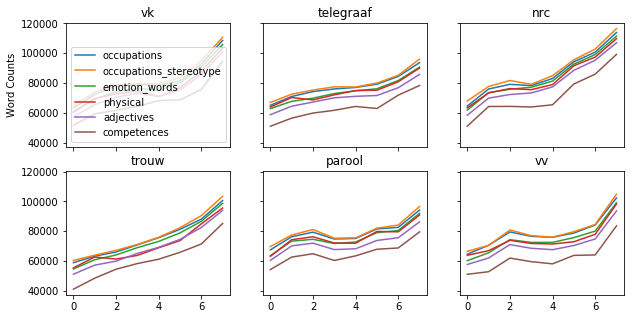

In [13]:
fig, axis = plt.subplots(2, 3, figsize=(10, 5), sharey=True, sharex=True)
axis = axis.ravel()
seeds_ = [occupations, occupations_stereotype, emotion_words, physical, adjectives, competences]
seed_names = ['occupations', 'occupations_stereotype', 'emotion_words', 'physical', 'adjectives', 'competences']


for i, model in enumerate(embeddings):
    model_name = embedding_names[i]
    counts_list = {}
    for name, list_ in zip(seed_names, seeds_):
        counts_avg = []
        for m in model:
            counts = []
            for word in list_:
                try:
                    counts.append(m.vocab[word].count)
                except: 
                    pass
            counts_avg.append(np.mean(counts))
        counts_list[name] = counts_avg

    for name in seed_names:
        axis[i].plot(counts_list[name], label=name)
        axis[i].set_title(model_name)
        
    if not i%6:
        axis[i].legend()
        axis[i].set_ylabel('Word Counts')


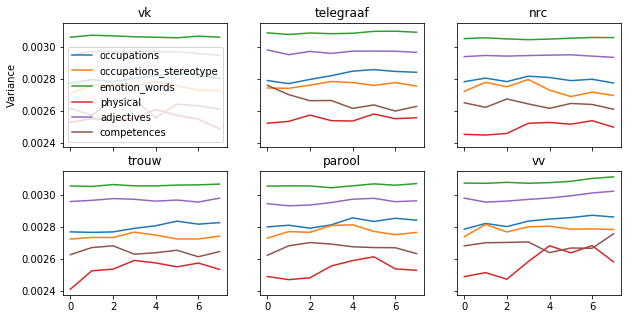

In [14]:
fig, axis = plt.subplots(2, 3, figsize=(10, 5), sharey=True, sharex=True)
axis = axis.ravel()
seeds_ = [occupations, occupations_stereotype, emotion_words, physical, adjectives, competences]
seed_names = ['occupations', 'occupations_stereotype', 'emotion_words', 'physical', 'adjectives', 'competences']

#avgvar = np.mean(np.var(np.array([vectors[word] for word in validwords]), axis = 0))
#            variances.append(avgvar)

for i, model in enumerate(embeddings):
    model_name = embedding_names[i]
    counts_list = {}
    for name, list_ in zip(seed_names, seeds_):
        counts_avg = []
        for m in model:
            counts = []
            for word in list_:
                try:
                    counts.append(m[word])
                except: 
                    pass
            counts_avg.append(np.mean(np.var(counts, axis=0)))
        counts_list[name] = counts_avg

    for name in seed_names:
        axis[i].plot(counts_list[name], label=name)
        axis[i].set_title(model_name)
    if not i%6:
        axis[i].legend()
        axis[i].set_ylabel('Variance')

Taken from Garg et al. <br>
More generally, we compute the representative group vector by taking the average of the vectors for each word in the given gender/ethnicity group. Then we compute the average Euclidean distance between each repre- sentative group vector and each vector in the neutral word list of interest, which could be occupations or adjectives. The difference of the average distances is our metric for bias—we call this the relative norm difference or simply embedding bias.

# BIAS

In [21]:
years = ['1950', '1955', '1960', '1965', '1970', '1975', '1980','1985']
#years = ['1950', '1960', '1970','1980']

In [16]:
def plot_bias(list1, list2, target_words):
    plt.clf()
    for index, model in enumerate(embeddings):
        fmts = ['x', 'o', 'v', '.', '*', '1', '2', '3']
        C, means, bounds = embedding_bias(list1, list2, target_words, model)
        x = range(1950 + index, 1990 + index, 5)
        y = np.array(means)
        bounds = np.array(bounds).T
        errors = np.zeros_like(bounds)
        errors[0,:] = y - bounds[0,:]
        errors[1,:] = bounds[1,:] - y
        plt.errorbar(x, y=means, yerr=errors, fmt=fmts[index], label=embedding_names[index])
        plt.ylabel('Embedding Bias')
        plt.legend()
        #plt.savefig('LIWC_{}.png'.format(name))
    

In [17]:
def embedding_bias(list1, list2, features, models):
    means = []
    bounds = []
    values = []
    year = []
    for index, model in enumerate(models):       
        v1 = np.mean(model[list1], axis=0)
        #v = calculate_vectors(model, male_words, female_words)
        v2 = np.mean(model[list2], axis=0)
        x = []
        y = []
        for word in features:
            try:
                x.append(calc_distance_between_vectors(v1, model[word]))
                y.append(calc_distance_between_vectors(v2, model[word]))
            except:
                pass
        C = [x_ - y_ for x_, y_ in zip(x, y)]
        values.append(C)
        means.append(np.mean(C))
        bounds.append(pb.bootstrap(C, confidence=0.875, iterations=5000, sample_size=.9, statistic=np.mean))
    return values, means, bounds

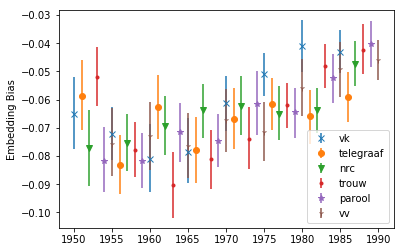

In [18]:
plot_bias(male_words, female_words, occupations_stereotype)

## Calculate distances

In [29]:
distance_m = []
distance_f = []
titles_ = []
years_ = []
variances = []
words = []
counts = []
for index, models in enumerate(embeddings):
    #'ah_nrc', 'trouw', 'telegraaf', 'vv', 'lc', 'parool']
    title = embedding_names[index]
    for i, model in enumerate(models):
        variance = []
        year = years[i]
        v_male = calculate_vector(model, male_words)
        v_female = calculate_vector(model, female_words)
        x = []     
        for word in occupations_stereotype:
            #if word not in male_words and word not in female_words:
            try:
                distance_m.append(calc_distance_between_vectors(v_male, model[word]))
                distance_f.append(calc_distance_between_vectors(v_female, model[word]))
                variance.append(model[word])
                counts.append(model.vocab[word].count)
                words.append(word)
                years_.append(year)
                titles_.append(title)
            #y.append(cossim(v2, model[word]))
            except:
                pass
df = pd.DataFrame(list(zip(distance_m, distance_f, words, counts, years_, titles_)), columns=['distance_m', 'distance_f', 'words', 'counts', 'years', 'titles'])
df['bias'] = df['distance_m'] - df['distance_f']

### Select quantiles

In [30]:
#df = df.groupby('years').apply(quantile_function, 0.1, 0.9, 'counts')
#df = df.drop('years', axis=1).reset_index()

In [31]:
#z_scores = pd.DataFrame((df['bias'].groupby([df['years'], df['titles']]).mean() - df['bias'].groupby(df['titles']).mean()) / df['bias'].groupby(df['titles']).mean())

### Prepare data for stats

In [43]:
df['years'] = df['years'].astype(int)
df['years.s'] = (df['years'] - df['years'].mean()) / df['years'].std()
df['bias.s'] = (df['bias'] - df['bias'].mean()) / df['bias'].std()
df['counts.s'] = (df['counts'] - df['counts'].mean()) / df['counts'].std()
#df['years.c'] = df['years'].replace([1950, 1960, 1970, 1980], [0, 1, 2, 3]).astype(int)
df['years.c'] = df['years'].replace([1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985], 
                                    [0, 1, 2, 3, 4, 5, 6, 7])

In [33]:
#df = df[(df['years'] == 1960) & (df['titles'] == 'trouw')]
#df = df[df['titles'] == 'vk_sample'].copy()

In [44]:
words = df['words'].unique()
z = pd.Categorical(df['words'])
df['word_id'] = z.codes
word_idx = df['word_id'].values

newspaper_names = df['titles'].unique()
z = pd.Categorical(df['titles'])
df['newspaper_id'] = z.codes
newspaper_idx = df['newspaper_id'].values

# linear model

In [49]:
with pm.Model() as model_1:
    a = pm.Normal('a', mu=10, sd=10)
    bA = pm.Normal('bA', mu=0, sd=10)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    mu = pm.Deterministic('mu', a + bA * df['years.c'])
    Divorce = pm.Normal('Distance', mu=mu, sd=sigma, observed=df['bias.s'])
    trace_1 = pm.sample(1000, tune=800, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bA, a]
Sampling 4 chains: 100%|██████████| 7200/7200 [00:03<00:00, 1972.90draws/s]


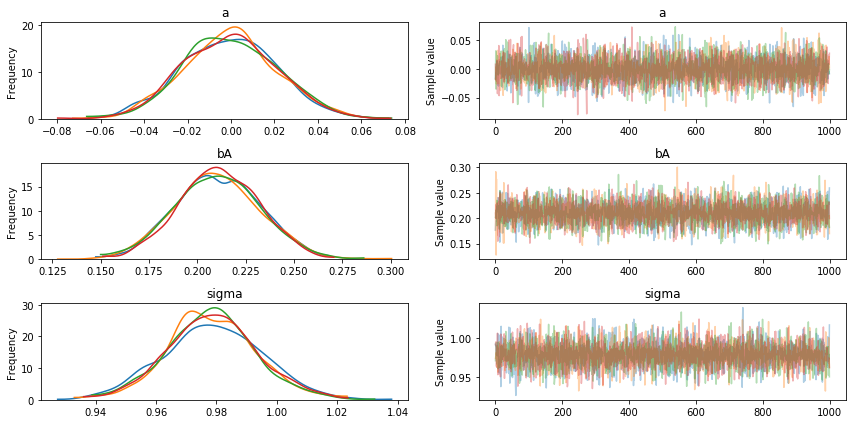

In [46]:
varnames = ['a', 'bA', 'sigma']
pm.traceplot(trace_1, varnames);

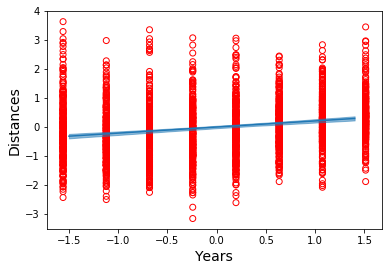

In [47]:
seq_x = np.arange(-1.5, 1.5, 0.10)
mu_pred = np.zeros((len(seq_x), len(trace_1['bA'])))
for i_seq, seq in enumerate(seq_x):
    mu_pred[i_seq] = trace_1['a'] + trace_1['bA'] * seq_x[i_seq]

mu_mean = mu_pred.mean(1)
mu_hpd = pm.hpd(mu_pred.T, alpha=0.05)

plt.scatter(df['years.c'], df['bias.s'], facecolors='none', edgecolors='r')
plt.plot(seq_x, mu_mean, 'C0')
plt.fill_between(seq_x, mu_hpd[:,0], mu_hpd[:,1], color='C0', alpha=0.5)
plt.ylabel('Distances', fontsize=14)
plt.xlabel('Years', fontsize=14);
plt.savefig('pltje.png')

### Individual traces

In [48]:
indiv_traces = {}

for newspaper in newspaper_names:

    c_data = df.loc[df['titles'] == newspaper]
    c_data = c_data.reset_index(drop=True)
    
    c_bias = c_data['bias.s']
    c_years = c_data['years.c'].values
    
    with pm.Model() as individual_model:
        a = pm.Normal('alpha', mu=0, sd=1)
        b = pm.Normal('beta', mu=0, sd=1)
        eps = pm.HalfCauchy('eps', beta=1)

        bias_est = a + b * c_years
        y_like = pm.Normal('y_like', mu=bias_est, sd=eps, observed=c_bias)

        trace = pm.sample(progressbar=False, tune=1200)
        
    indiv_traces[newspaper] = trace

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, beta, alpha]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, beta, alpha]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, beta, alpha]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, beta, alpha]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, beta, alpha]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, beta, alpha]


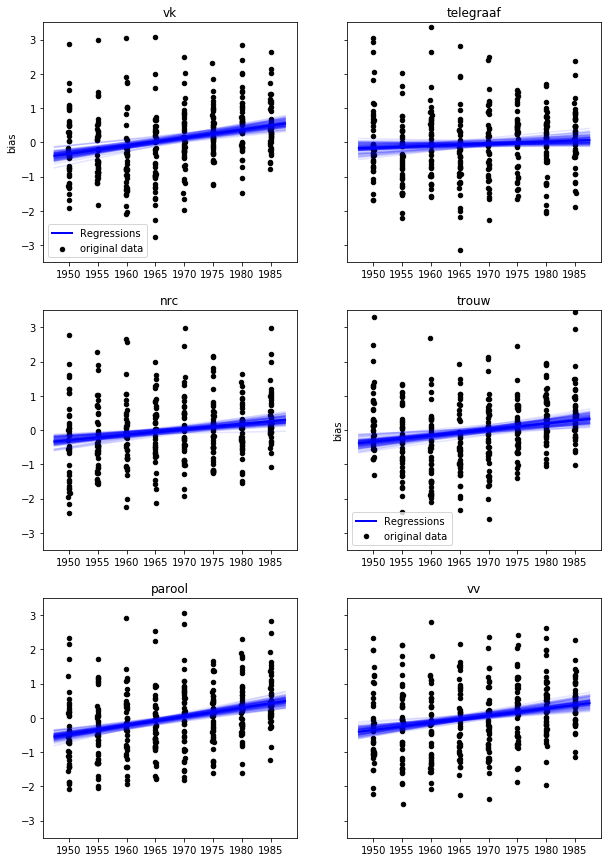

In [59]:
fig, axis = plt.subplots(3, 2, figsize=(10, 15), sharey=True, sharex=False)
axis = axis.ravel()
for i, c in enumerate(newspaper_names):
    c_data = df.loc[df['titles'] == c]
    c_data = c_data.reset_index(drop = True)
    z = list(c_data['newspaper_id'])[0]

    xvals = np.linspace(-0.5, 7.5)
    for a_val, b_val in zip(indiv_traces[c]['alpha'][::20], indiv_traces[c]['beta'][::20]):
        axis[i].plot(xvals, a_val + b_val * xvals, 'b', alpha=.1)
    axis[i].plot(xvals, indiv_traces[c]['alpha'][::10].mean() + indiv_traces[c]['beta'][::10].mean() * xvals, 'b', alpha=1, lw=2., label='Regressions')
    axis[i].scatter(c_data['years.c'].values + np.random.randn(len(c_data))*0.01, c_data['bias.s'], alpha=1, color='k', marker='.', s=80, label='original data')
    axis[i].set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
    axis[i].set_xticklabels(years)
    axis[i].set_ylim(-3.5, 3.5)
    axis[i].set_title(c)
    if not i%3:
        axis[i].legend()
        axis[i].set_ylabel('bias')

## Hierarchical model

In [60]:
with pm.Model() as hierarchical_model:
    mu_a = pm.Normal('mu_alpha', mu=0, sd=1)
    sigma_a = pm.HalfCauchy('sigma_alpha', beta=1)
    mu_b = pm.Normal('mu_beta', mu=0, sd=1)
    sigma_b = pm.HalfCauchy('sigma_beta', beta=1)
    
    a = pm.Normal('alpha', mu=mu_a, sd=sigma_a, shape=len(df['titles'].unique()))
    
    b = pm.Normal('beta', mu=mu_b, sd=sigma_b, shape=len(df['titles'].unique()))
    
    eps = pm.HalfCauchy('eps', beta=1)
    
    bias_est = a[newspaper_idx] + b[newspaper_idx] * df['years.c'].values
    
    #data likelihood
    y_like = pm.Normal('y_like', mu=bias_est, sd=eps, observed=df['bias.s'])

with hierarchical_model:
    hierarchical_trace = pm.sample(tune=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, beta, alpha, sigma_beta, mu_beta, sigma_alpha, mu_alpha]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:11<00:00, 348.04draws/s]
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9186932649303855, but should be close to 0.8. Try to increase the number of tuning steps.
There were 18 divergences after tuning. Increase `target_accept` or reparameterize.
There were 22 divergences after tuning. Increase `target_accept` or reparameterize.
There were 38 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7199858624504129, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


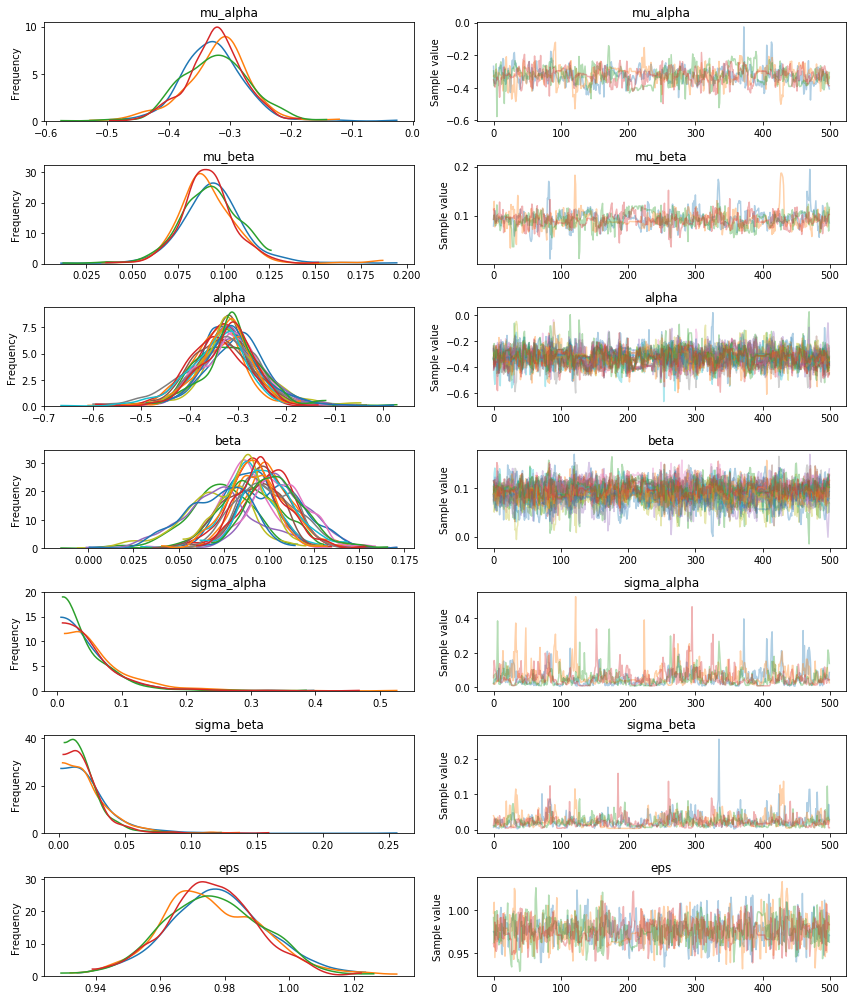

In [61]:
pm.traceplot(hierarchical_trace);

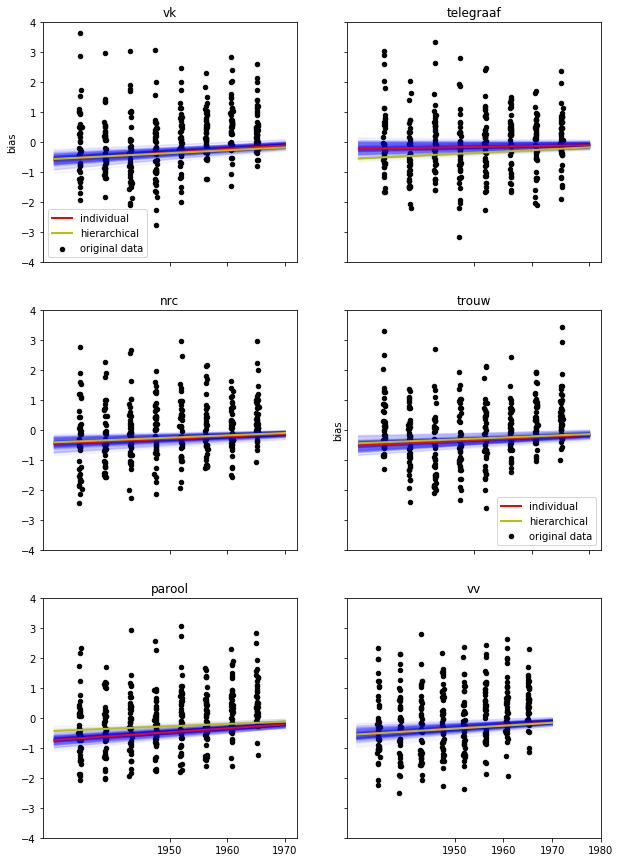

In [62]:
fig, axis = plt.subplots(3, 2, figsize=(10, 15), sharey=True, sharex=True)
axis = axis.ravel()
for i, c in enumerate(newspaper_names):
    c_data = df.loc[df['titles'] == c]
    c_data = c_data.reset_index(drop = True)
    z = list(c_data['newspaper_id'])[0]

    xvals = np.linspace(-2, 2)
    for a_val, b_val in zip(indiv_traces[c]['alpha'][::10], indiv_traces[c]['beta'][::10]):
        axis[i].plot(xvals, a_val + b_val * xvals, 'b', alpha=.05)
    axis[i].plot(xvals, indiv_traces[c]['alpha'][::10].mean() + indiv_traces[c]['beta'][::10].mean() * xvals, 
                 'r', alpha=1, lw=2., label='individual')
    for a_val, b_val in zip(hierarchical_trace['alpha'][::10][z], hierarchical_trace['beta'][::10][z]):
        axis[i].plot(xvals, a_val + b_val * xvals, 'g', alpha=.05)
    axis[i].plot(xvals, hierarchical_trace['alpha'][::10][z].mean() + hierarchical_trace['beta'][::10][z].mean() * xvals, 
                 'y', alpha=1, lw=2., label='hierarchical')
    axis[i].scatter(c_data['years.s'].values + np.random.randn(len(c_data))*0.01, c_data['bias.s'], 
                    alpha=1, color='k', marker='.', s=80, label='original data')
    axis[i].set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
    axis[i].set_xticklabels(['1950', '1960', '1970', '1980'])
    axis[i].set_ylim(-4, 4)
    axis[i].set_title(c)
    if not i%3:
        axis[i].legend()
        axis[i].set_ylabel('bias')

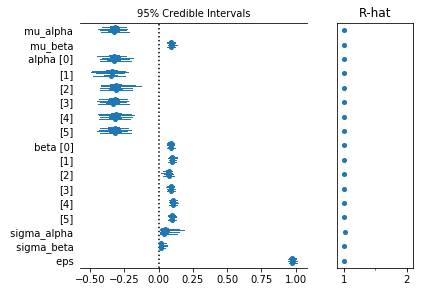

In [63]:
pm.forestplot(hierarchical_trace);

## Inspect Bias

In [64]:
def plot_differences(list1, list2, model, features):
    features = [word for word in features if word in model.vocab]
    v1 = np.mean(model[list1], axis=0)
    v2 = np.mean(model[list2], axis=0)
    x = []
    y = []
    for word in features:
        x.append(calc_distance_between_vectors(model[word], v1))
        y.append(calc_distance_between_vectors(model[word], v2))
    C = [x_ - y_ for x_, y_ in zip(x, y)]
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(x, y, marker='x')
    plt.xlabel('distance to male')
    plt.ylabel('distance to female')
    for i, label in enumerate(features):
        ax.annotate(label, (x[i], y[i]))
    #ax.plot([min(y), (max(y))], [min(y) - 0.0, (max(y) - np.mean(C))], ls="--", c=".3")
    ax.plot([min(y), (max(y))], [min(y) - 0.0, (max(y))], ls="--", c=".3")

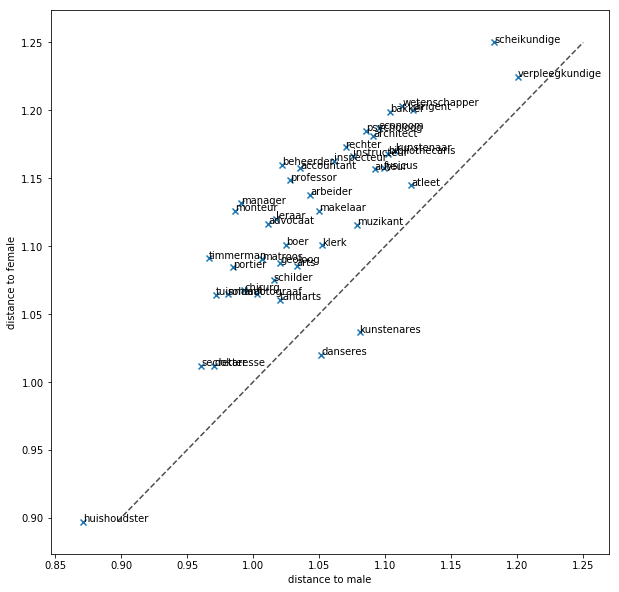

In [77]:
plot_differences(male_words, female_words, models_parool[3], occupations_stereotype)

### Words Model

In [78]:
words = df['words'].unique()
z = pd.Categorical(df['words'])
df['word_id'] = z.codes
word_idx = df['word_id'].values

newspaper_names = df['titles'].unique()
z = pd.Categorical(df['titles'])
df['newspaper_id'] = z.codes
newspaper_idx = df['newspaper_id'].values

In [79]:
indiv_traces = {}

for word in words:

    c_data = df.loc[df['words'] == word]
    c_data = c_data.reset_index(drop=True)
    
    c_bias = c_data['bias.s']
    c_years = c_data['years.c'].values
    
    with pm.Model() as individual_model:
        a = pm.Normal('alpha', mu=0, sd=1)
        b = pm.Normal('beta', mu=0, sd=1)
        eps = pm.HalfCauchy('eps', beta=1)

        bias_est = a + b * c_years
        y_like = pm.Normal('y_like', mu=bias_est, sd=eps, observed=c_bias)

        trace = pm.sample(progressbar=False, tune=1200)
        
    indiv_traces[word] = trace

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, beta, alpha]
The acceptance probability does not match the target. It is 0.8884044836792908, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, beta, alpha]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, beta, alpha]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, beta, alpha]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, beta, alpha]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ep

In [80]:
with pm.Model() as hierarchical_model:
    mu_a = pm.Normal('mu_alpha', mu=0, sd=1)
    sigma_a = pm.HalfCauchy('sigma_alpha', beta=1)
    mu_b = pm.Normal('mu_beta', mu=0, sd=1)
    sigma_b = pm.HalfCauchy('sigma_beta', beta=1)
    
    a = pm.Normal('alpha', mu=mu_a, sd=sigma_a, shape=len(df['words'].unique()))
    
    b = pm.Normal('beta', mu=mu_b, sd=sigma_b, shape=len(df['words'].unique()))
    
    eps = pm.HalfCauchy('eps', beta=1)
    
    bias_est = a[word_idx] + b[word_idx] * df['years.c'].values
    
    #data likelihood
    y_like = pm.Normal('y_like', mu=bias_est, sd=eps, observed=df['bias.s'])

with hierarchical_model:
    hierarchical_trace = pm.sample(chains=4, cores=8)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 8 jobs)
NUTS: [eps, beta, alpha, sigma_beta, mu_beta, sigma_alpha, mu_alpha]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:11<00:00, 360.54draws/s]


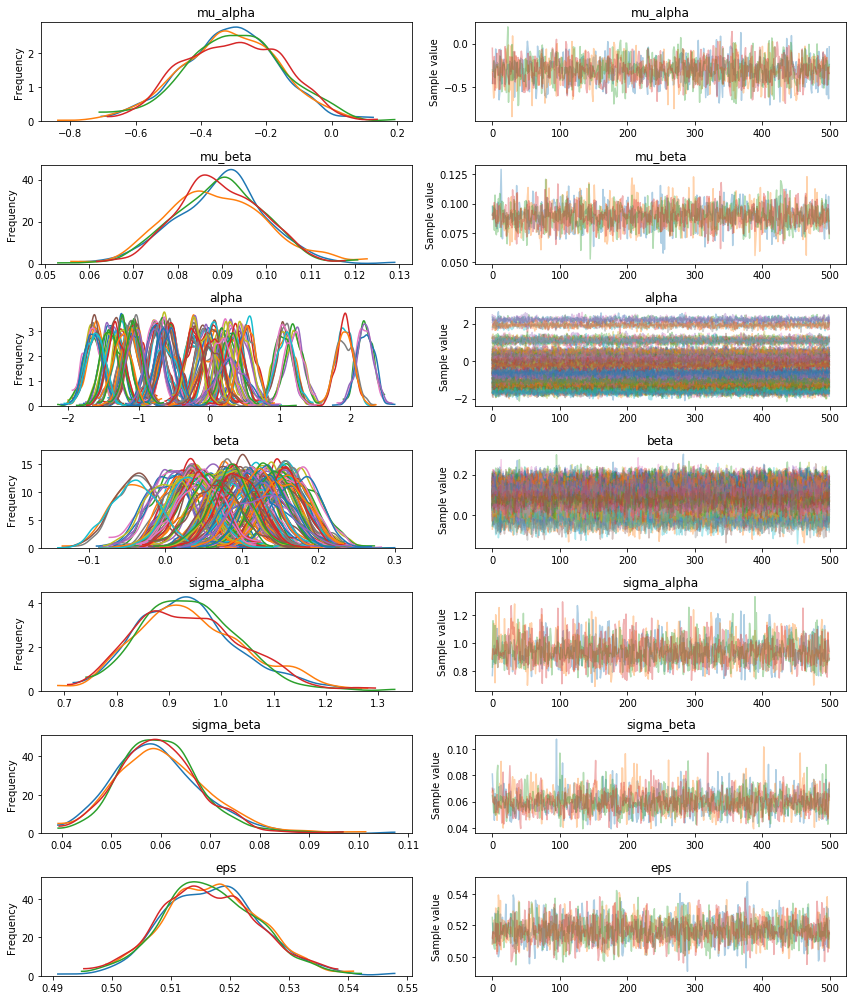

In [81]:
pm.traceplot(hierarchical_trace);

In [82]:
#pm.summary(hierarchical_trace, alpha=.11).round(3)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


31
37
8


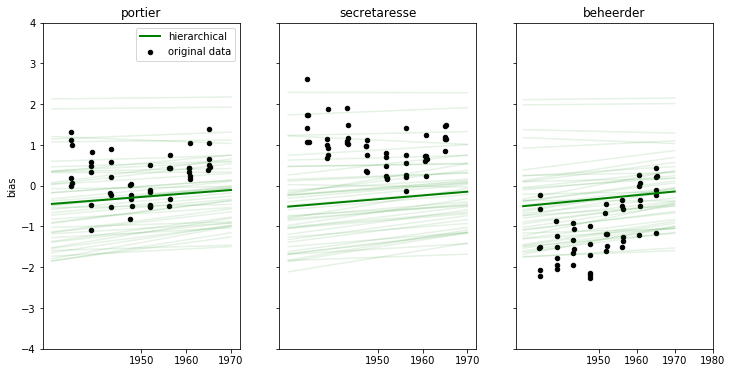

In [83]:
fig, axis = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axis = axis.ravel()
for i, c in enumerate([words[10], words[15], words[37]]):
    c_data = df.ix[df['words'] == c]
    c_data = c_data.reset_index(drop = True)
    z = list(c_data['word_id'])[0]
    print(z)

    xvals = np.linspace(-2, 2)
    for a_val, b_val in zip(hierarchical_trace['alpha'][::10][z], hierarchical_trace['beta'][::10][z]):
        axis[i].plot(xvals, a_val + b_val * xvals, 'g', alpha=.1)
    axis[i].plot(xvals, hierarchical_trace['alpha'][::10][z].mean() + hierarchical_trace['beta'][::10][z].mean() * xvals, 
                 'g', alpha=1, lw=2., label='hierarchical')
    axis[i].scatter(c_data['years.s'].values + np.random.randn(len(c_data))*0.01, c_data['bias.s'], 
                    alpha=1, color='k', marker='.', s=80, label='original data')
    axis[i].set_xticks([0,1, 2, 3])
    axis[i].set_xticklabels(['1950', '1960', '1970', '1980'])
    axis[i].set_ylim(-4, 4)
    axis[i].set_title(c)
    if not i%3:
        axis[i].legend()
        axis[i].set_ylabel('bias')

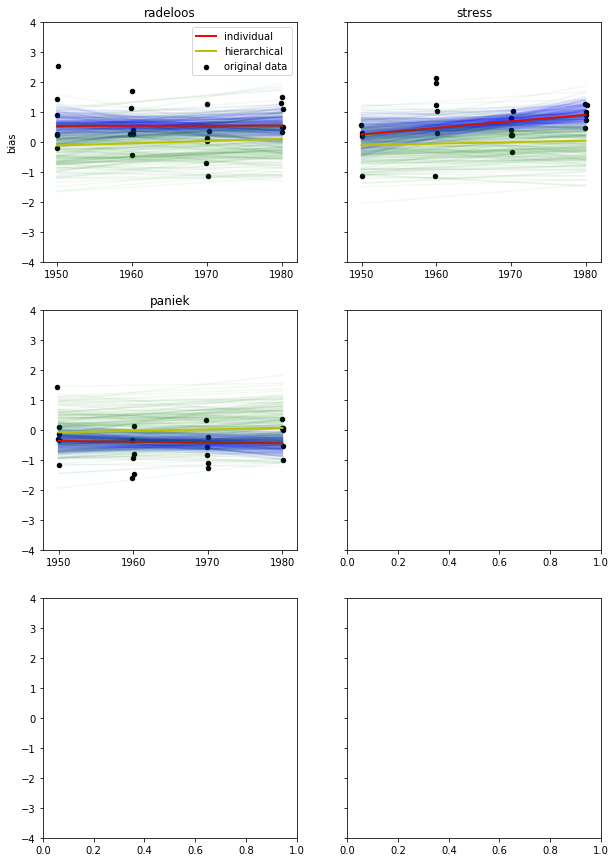

In [343]:
fig, axis = plt.subplots(3, 2, figsize=(10, 15), sharey=True, sharex=False)
axis = axis.ravel()
for i, c in enumerate([words[10], words[15], words[37]]):
    c_data = df.loc[df['words'] == c]
    c_data = c_data.reset_index(drop = True)
    z = list(c_data['word_id'])[0]

    xvals = np.linspace(0, 3)
    for a_val, b_val in zip(indiv_traces[c]['alpha'][::10], indiv_traces[c]['beta'][::10]):
        axis[i].plot(xvals, a_val + b_val * xvals, 'b', alpha=.05)
    axis[i].plot(xvals, indiv_traces[c]['alpha'][::10].mean() + indiv_traces[c]['beta'][::10].mean() * xvals, 
                 'r', alpha=1, lw=2., label='individual')
    for a_val, b_val in zip(hierarchical_trace['alpha'][::10][z], hierarchical_trace['beta'][::10][z]):
        axis[i].plot(xvals, a_val + b_val * xvals, 'g', alpha=.05)
    axis[i].plot(xvals, hierarchical_trace['alpha'][::10][z].mean() + hierarchical_trace['beta'][::10][z].mean() * xvals, 
                 'y', alpha=1, lw=2., label='hierarchical')
    axis[i].scatter(c_data['years.c'].values + np.random.randn(len(c_data))*0.01, c_data['bias.s'], 
                    alpha=1, color='k', marker='.', s=80, label='original data')
    axis[i].set_xticks([0, 1, 2, 3])
    axis[i].set_xticklabels(years)
    axis[i].set_ylim(-4, 4)
    axis[i].set_title(c)
    if not i%3:
        axis[i].legend()
        axis[i].set_ylabel('bias')